In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
"""
gen_dataset_figures
-------------------
This script generates figures that plot the distribution of the dataset for each case for each confound.
Both the entire dataset (all cases & all controls from each site with a control from the given condition),
and the selected subset (all cases and closely matched controls) are plotted.
"""

pheno_p = '/Users/harveyaa/Documents/masters/data/pheno_26-01-22.csv'

conf = ['AGE','mean_conn','FD_scrubbed','SEX','SITE']
cases = ['DEL15q11_2','DUP15q11_2','DUP15q13_3_CHRNA7','DEL2q13','DUP2q13','DUP16p13_11',
            'DEL13q12_12','DUP13q12_12','TAR_dup','DEL1q21_1','DUP1q21_1','DEL22q11_2',
            'DUP22q11_2','DEL16p11_2','DUP16p11_2','SZ','BIP','ASD','ADHD']

In [70]:
##############
# LOAD PHENO #
##############
pheno = pd.read_csv(pheno_p,index_col=0)

############
# LOAD IDS #
############
sel_ids = []
for case in cases:
    df = pd.read_csv(f"./datasets/{case}.txt",header=None)
    sel_ids.append(df)
sel_ids = dict(zip(cases,sel_ids))

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_82211/3738177175.py:4: DtypeWarning: Columns (7,8,12,13,14,19,20,24,27,31,42,43,44,49,51,59,60,62,64,65,68,101,121,163) have mixed types. Specify dtype option on import or set low_memory=False.
  pheno = pd.read_csv(pheno_p,index_col=0)


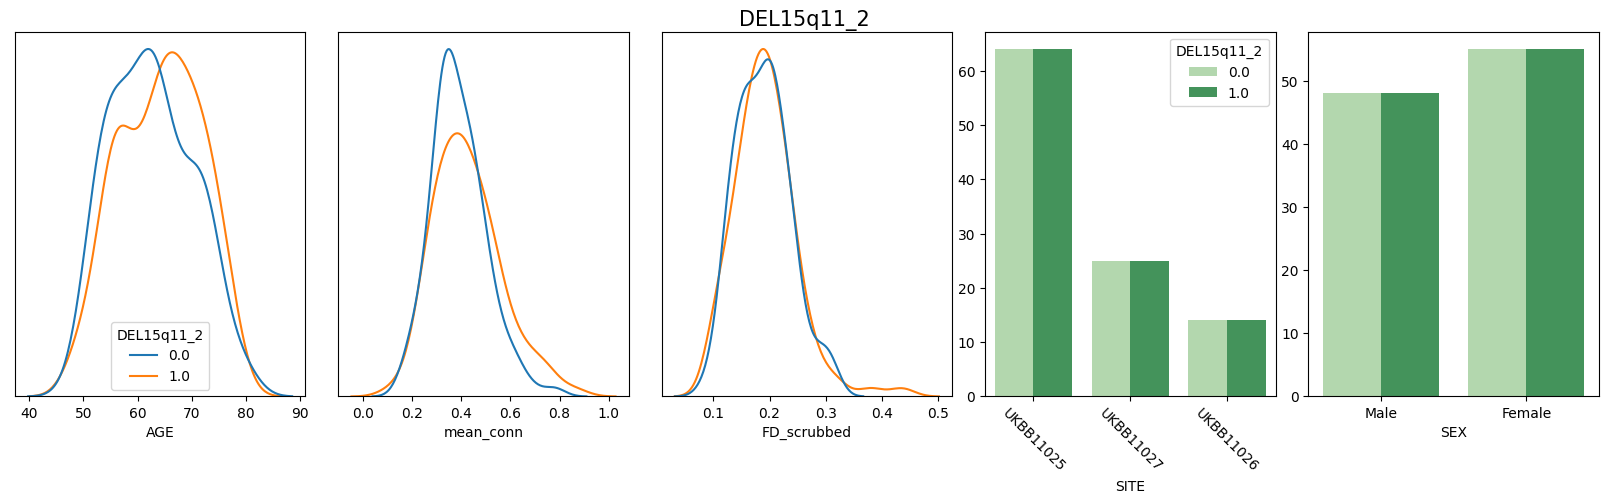

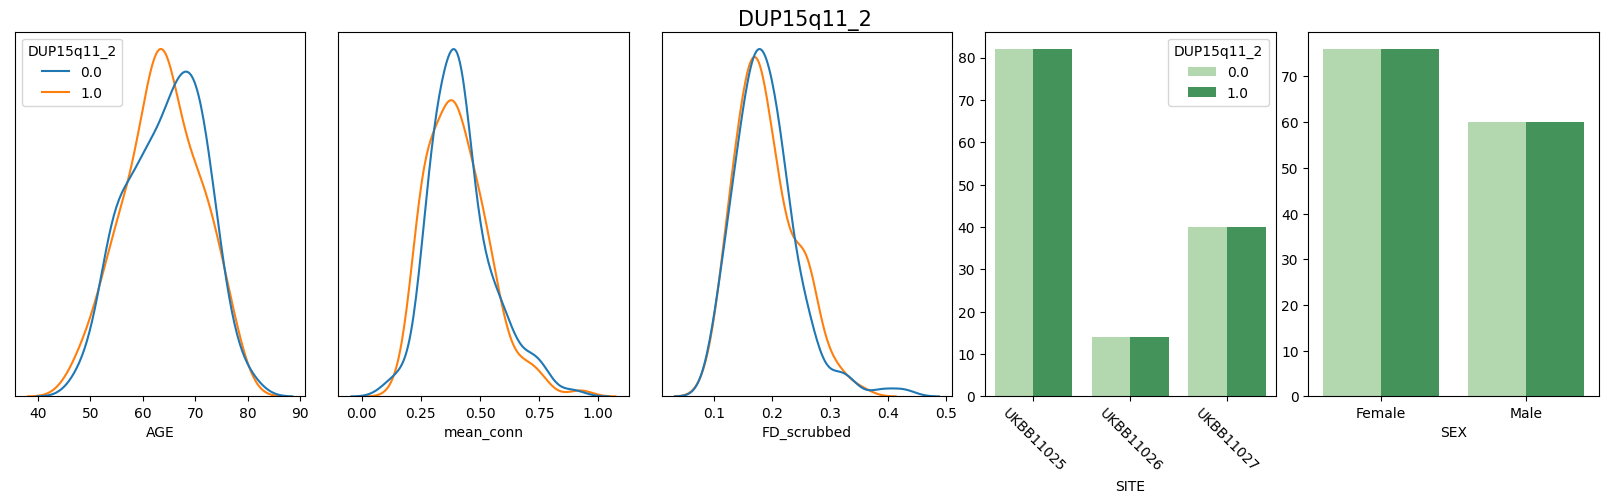

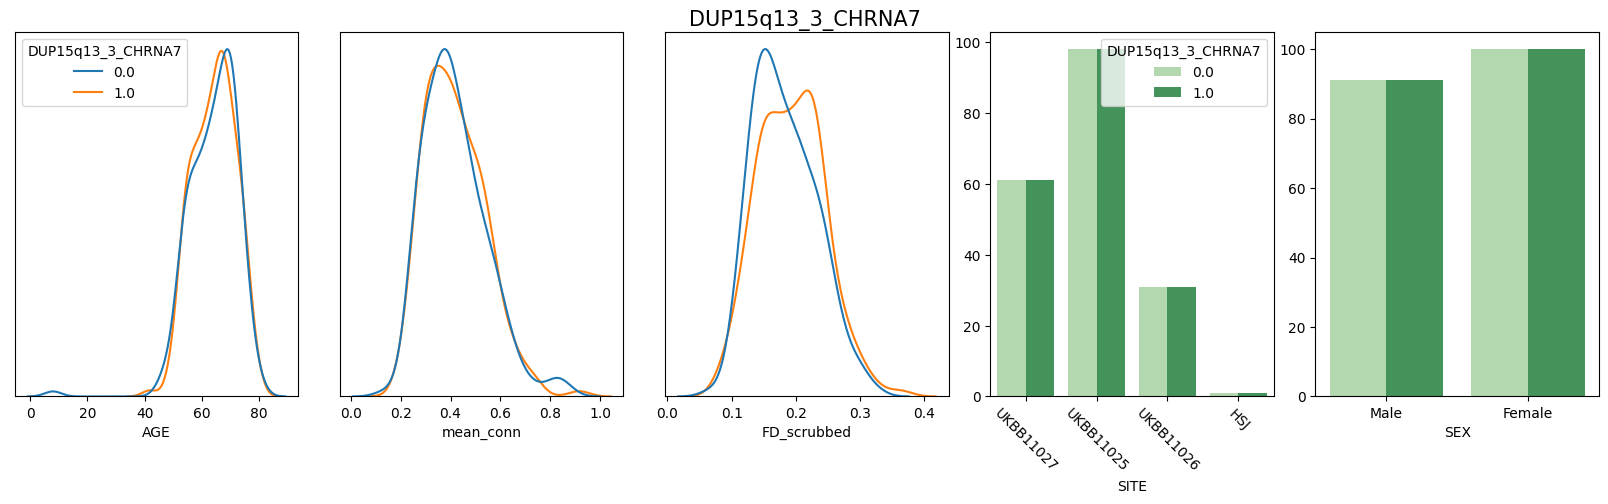

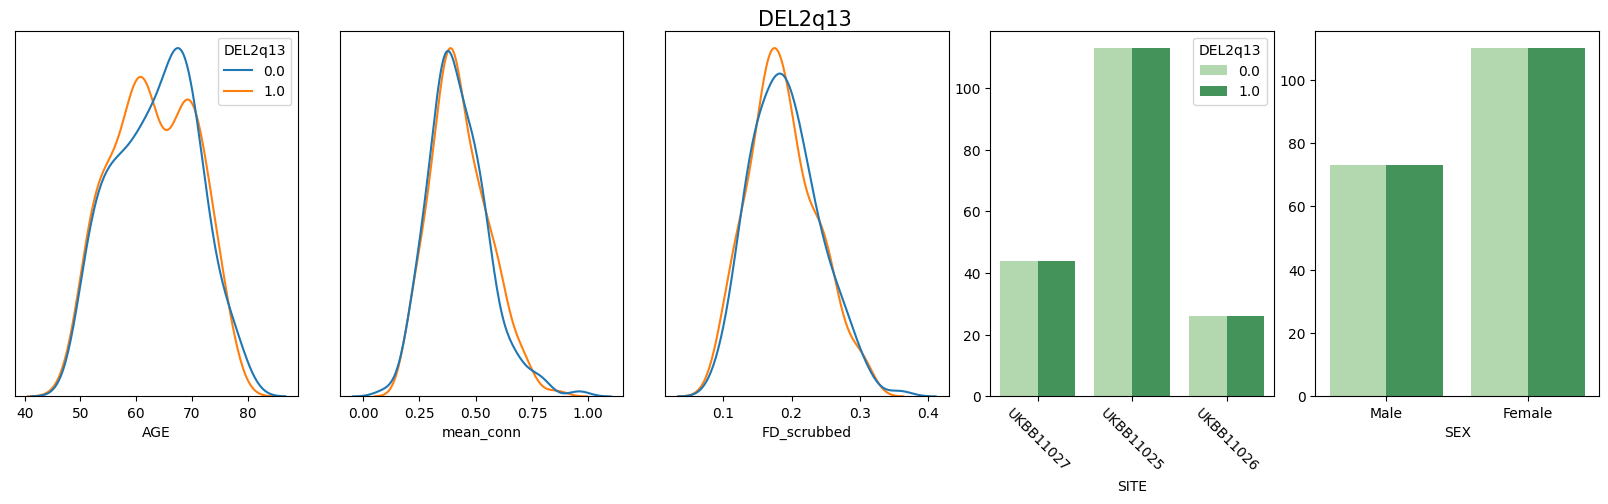

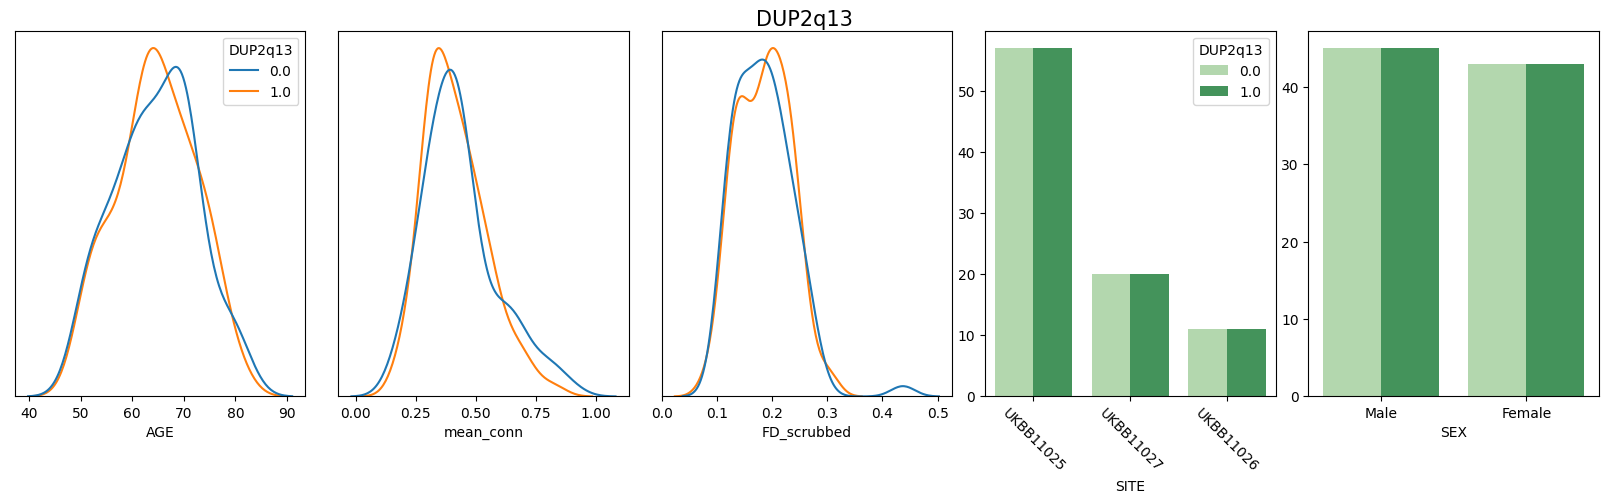

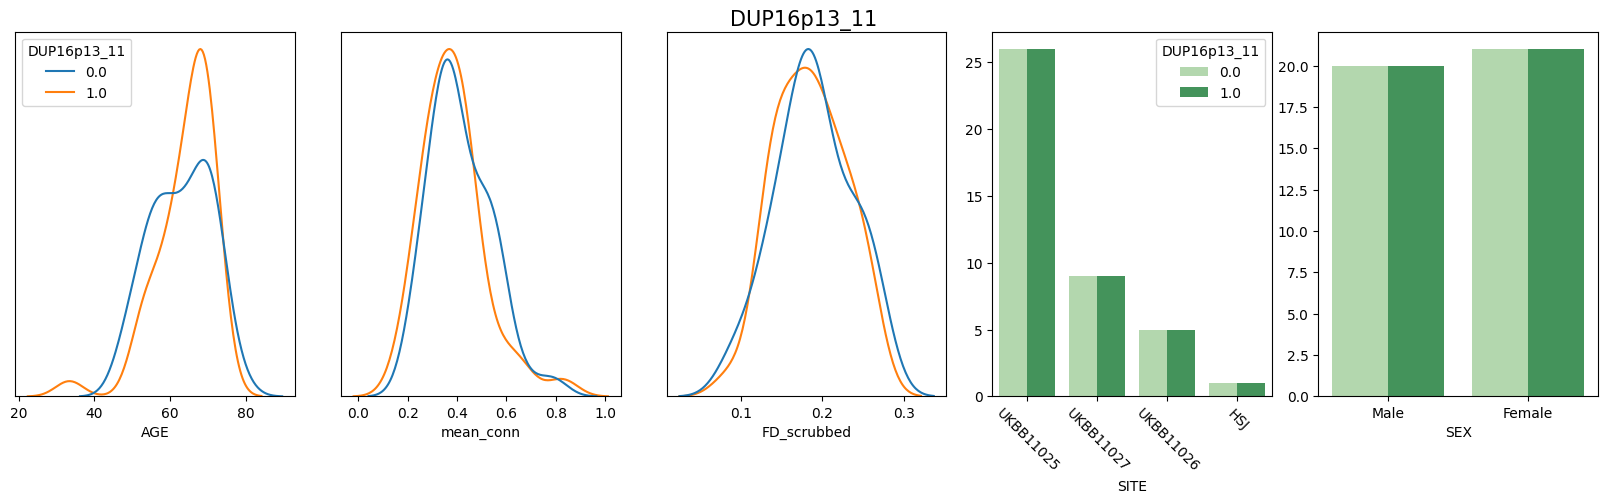

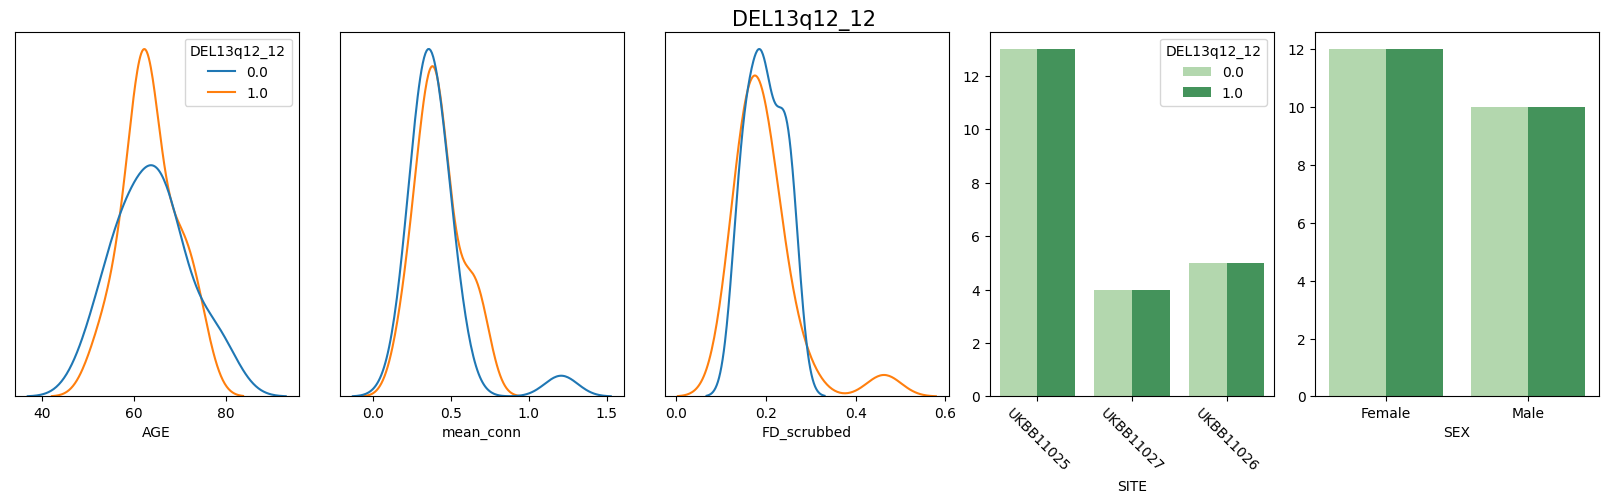

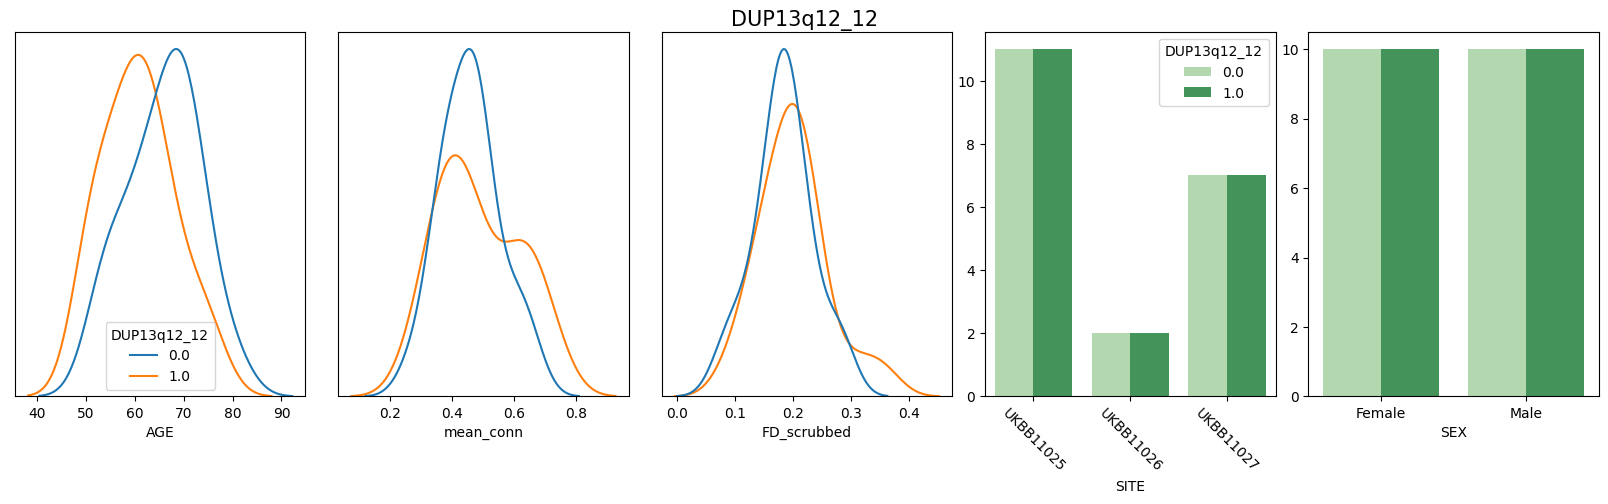

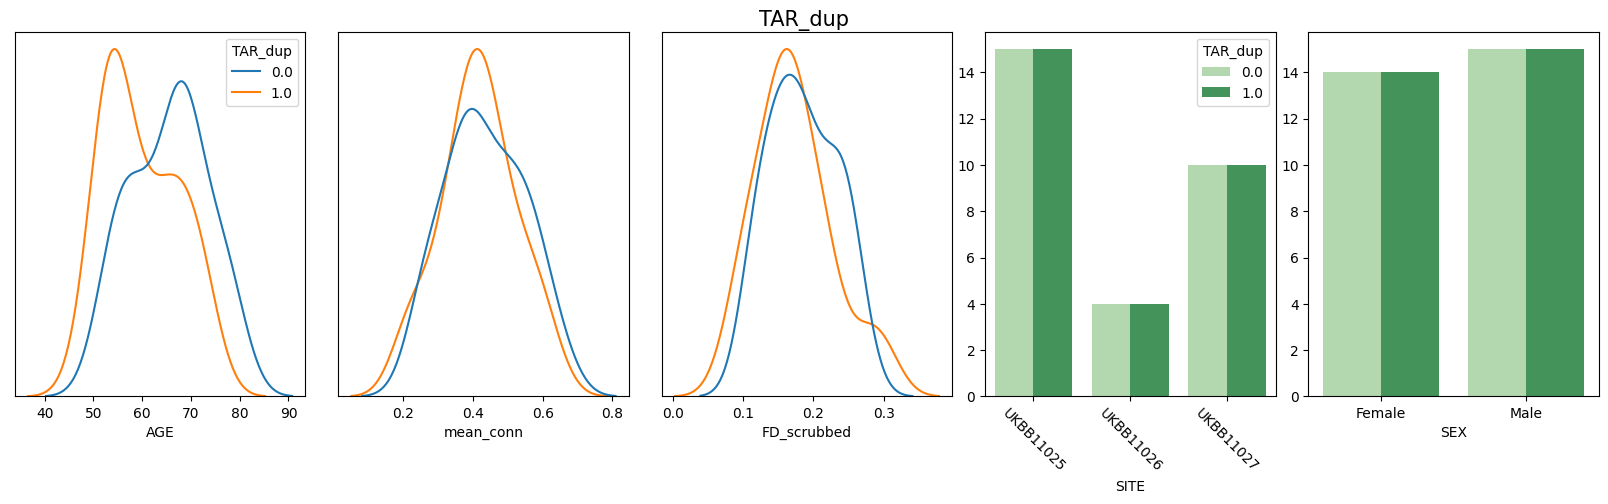

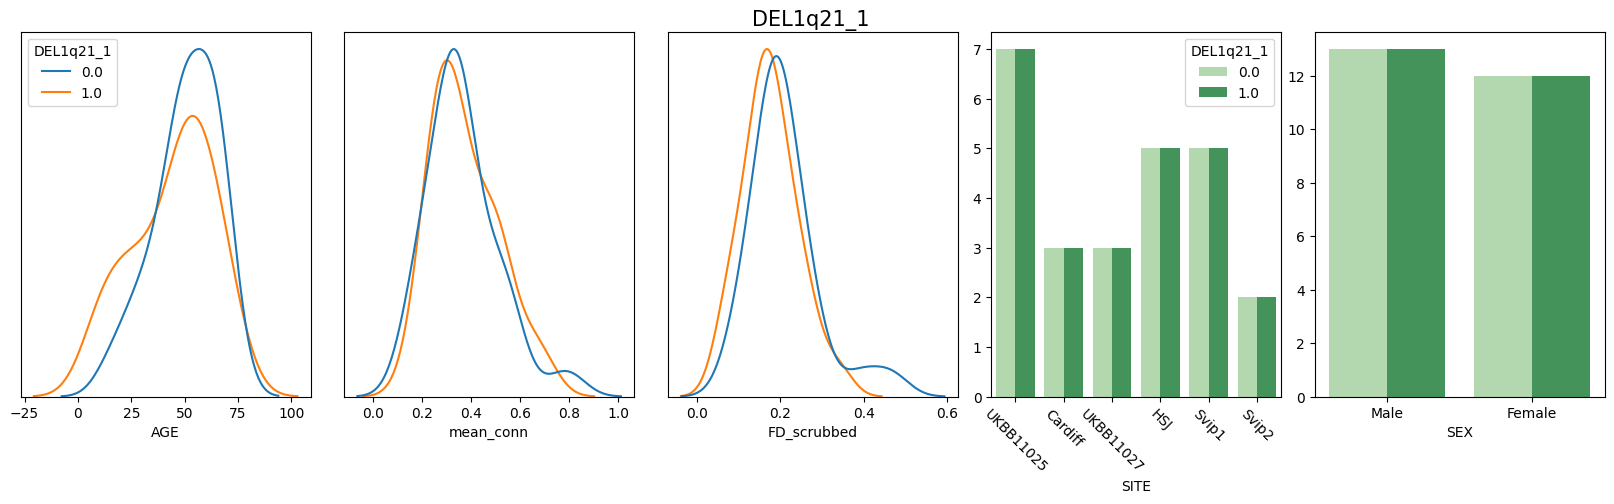

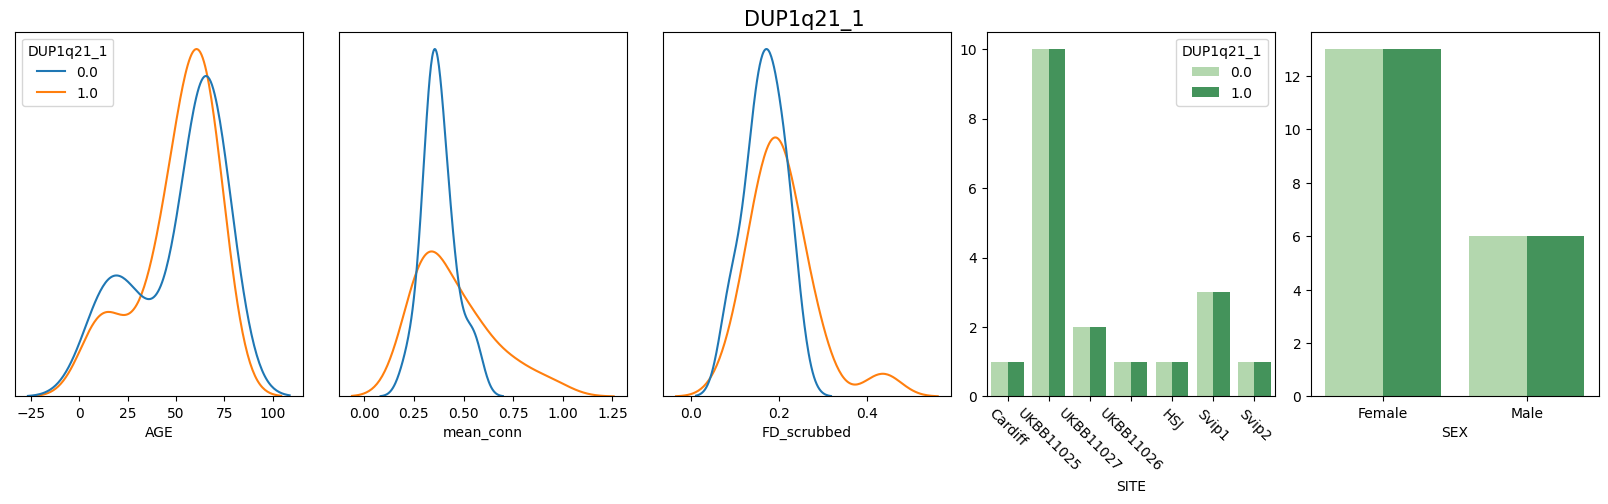

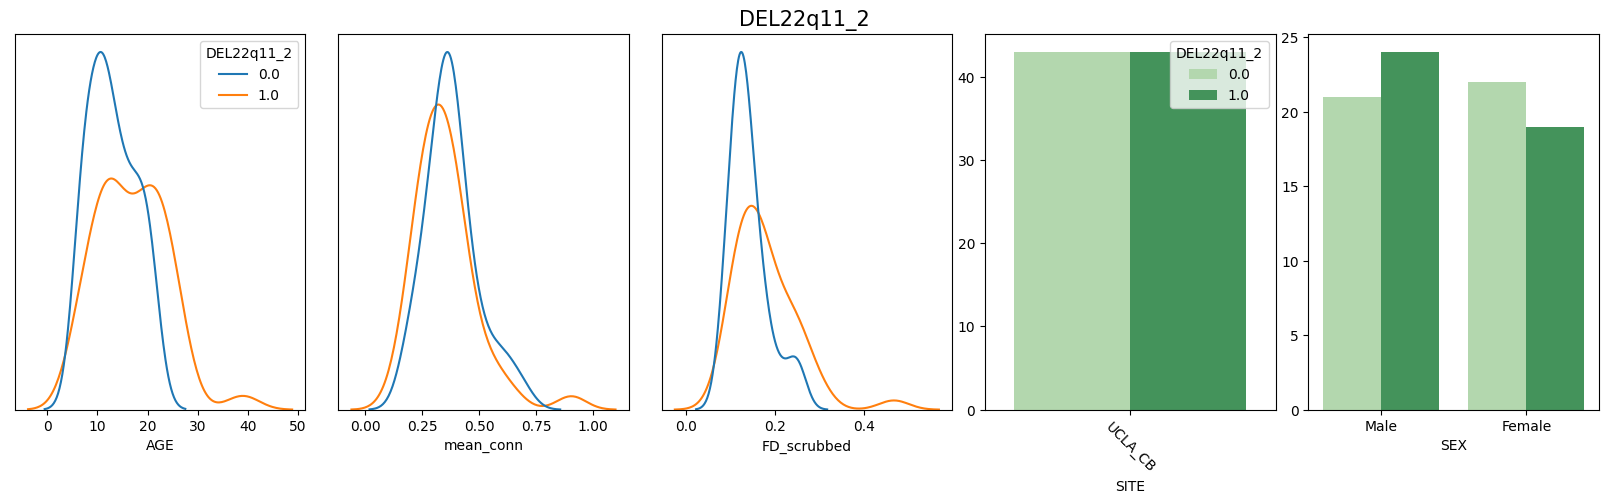

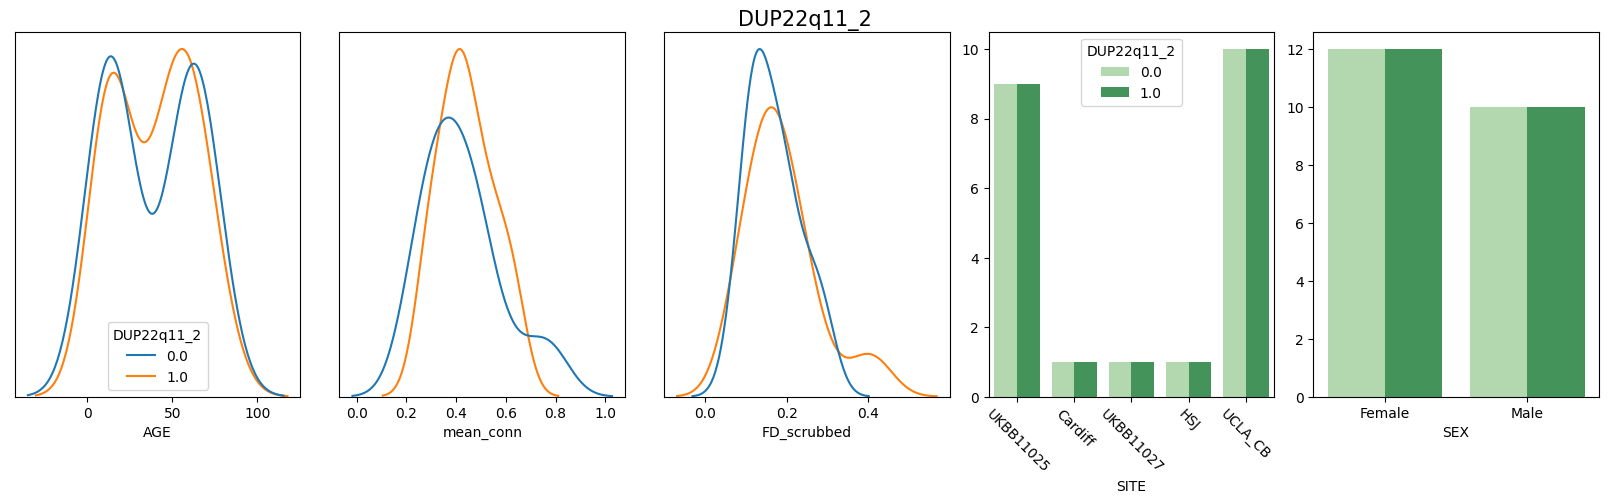

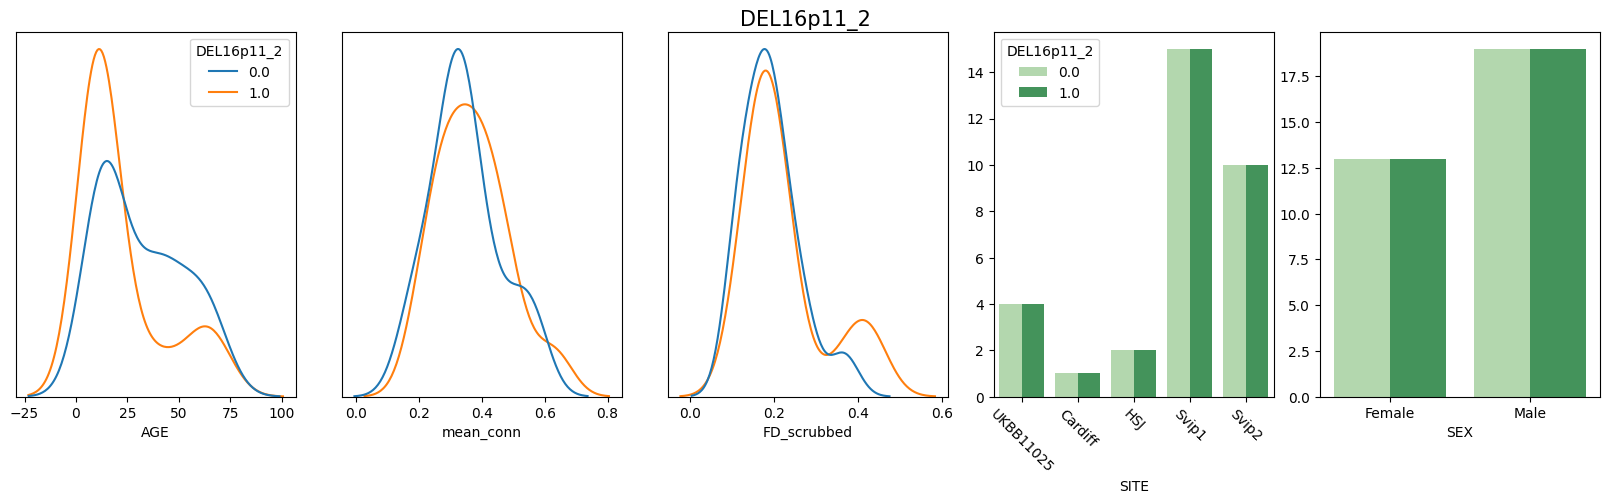

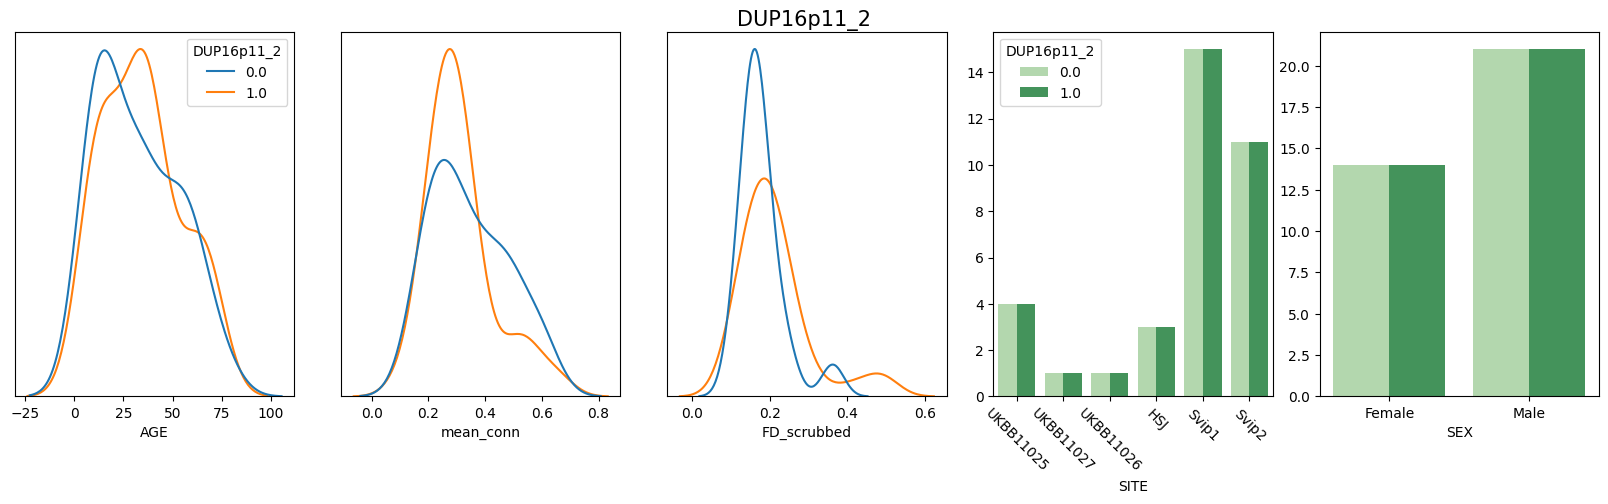

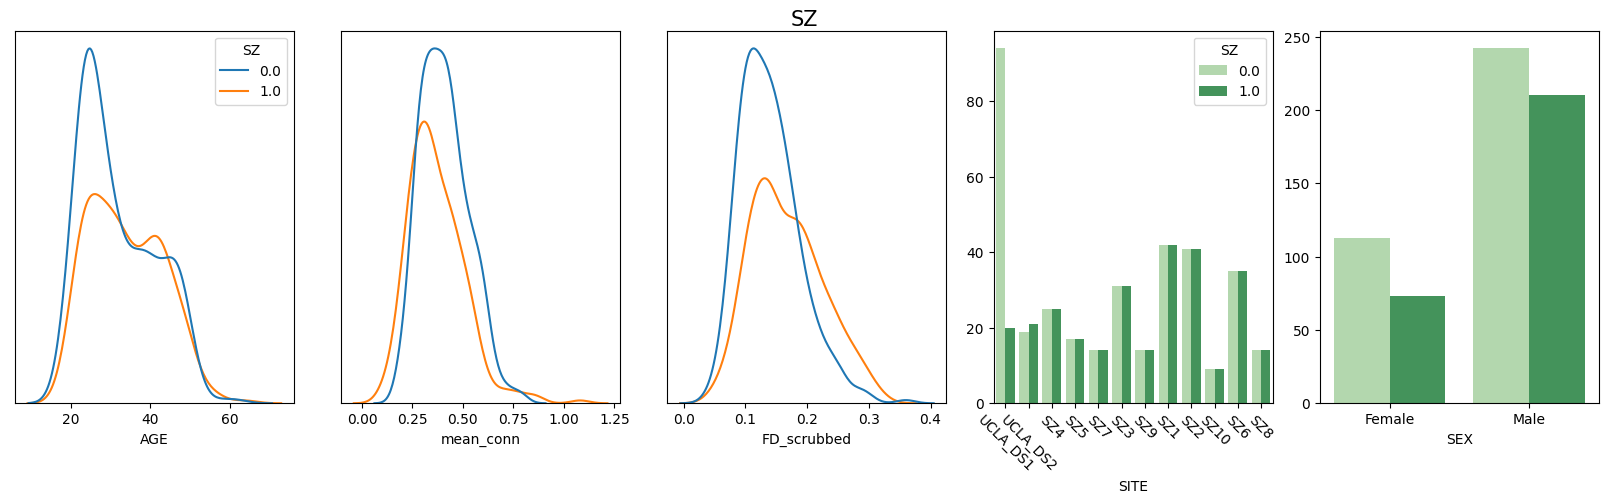

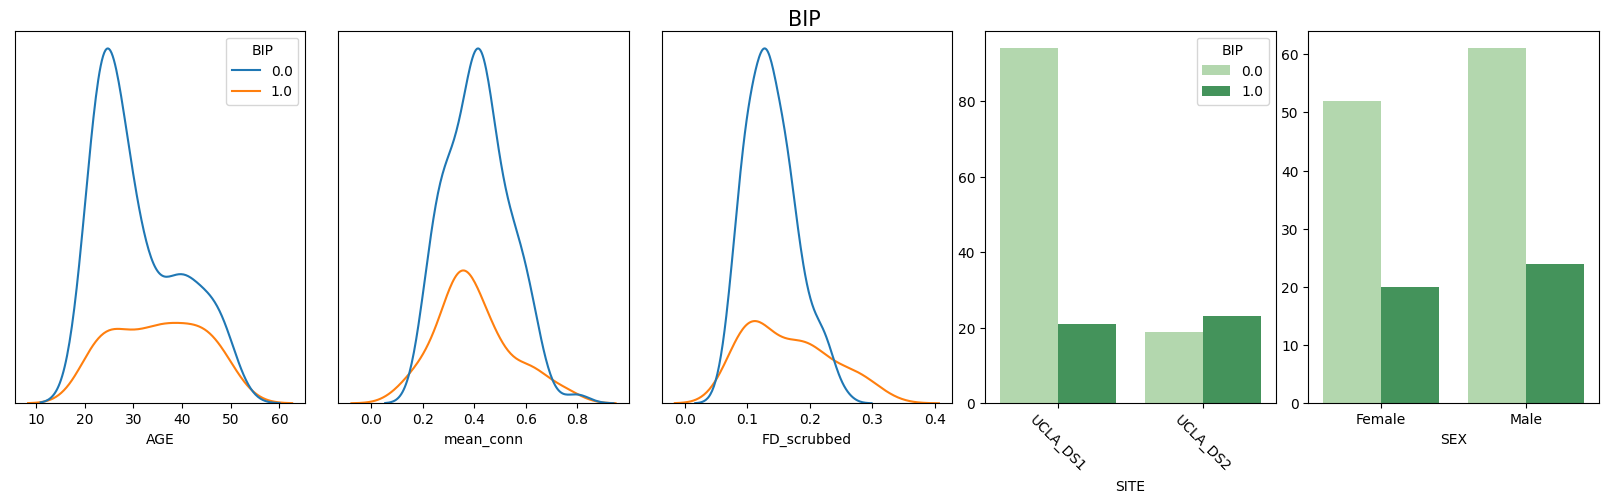

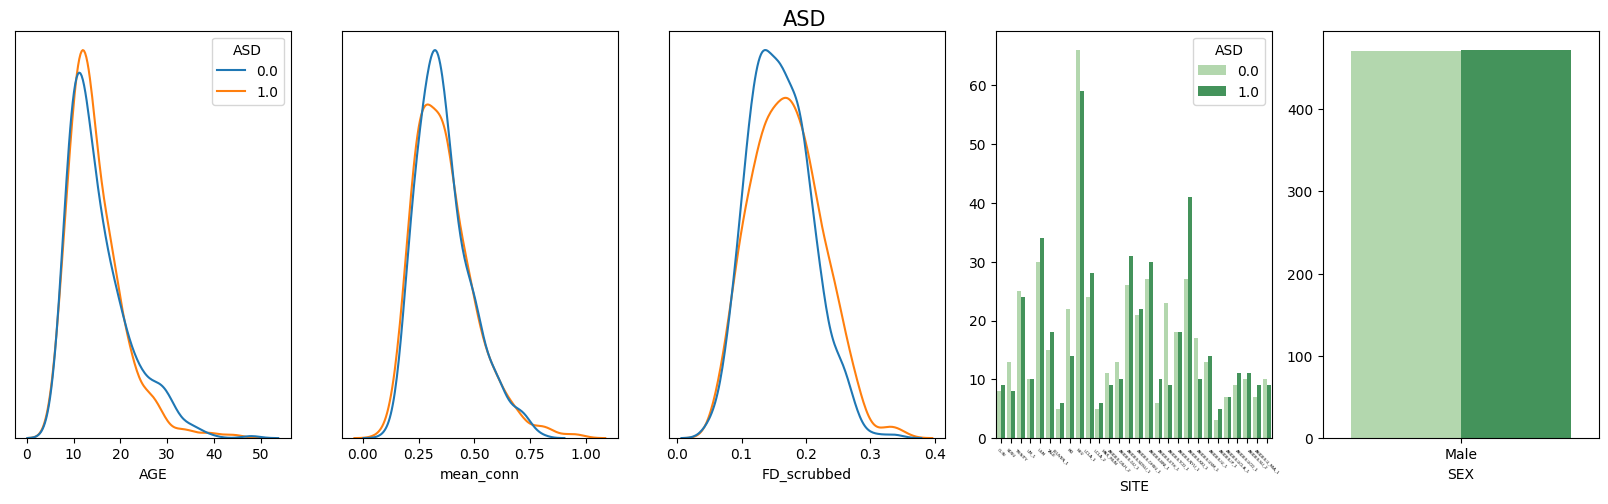

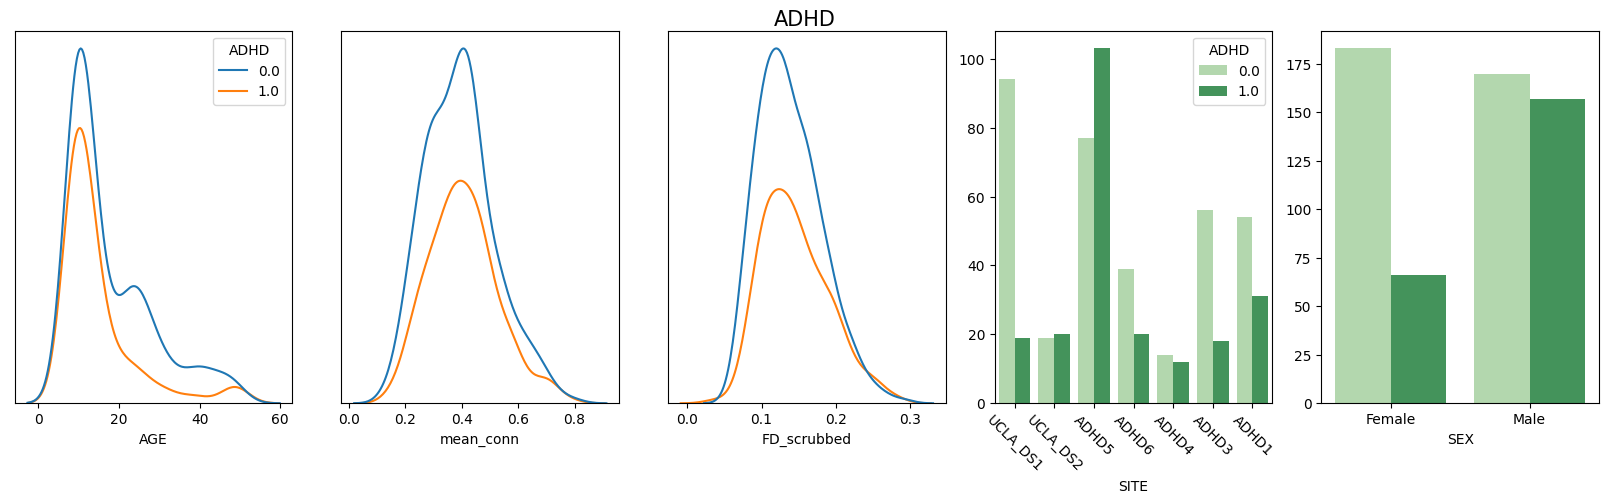

In [35]:
# CONF BY GROUP
out_p = './datasets/figures/conf_by_group'
for case in cases:
    ids = sel_ids[case]
    df = pheno[pheno.index.isin(ids[0])].copy()

    fig, ax = plt.subplots(1,5, figsize=(16,5))

    sns.kdeplot(x = 'AGE', data = df,hue = case,ax=ax[0])
    sns.kdeplot(x = 'mean_conn', data = df,hue = case,ax=ax[1],legend=False)
    sns.kdeplot(x = 'FD_scrubbed', data = df,hue = case,ax=ax[2],legend=False)
    sns.countplot(data=df, x="SITE",hue=case,ax=ax[3],palette='Greens')
    sns.countplot(data=df, x="SEX",hue=case,ax=ax[4],palette='Greens')
    ax[4].get_legend().remove()

    for i in range(3):
        ax[i].set_yticks([])
    for i in range(5):
        ax[i].set_ylabel('')
        
    if case == 'ASD':
        ax[3].set_xticklabels(ax[3].get_xticklabels(),rotation = 315,fontsize=3)
    else:
        ax[3].set_xticklabels(ax[3].get_xticklabels(),rotation = 315)

    plt.suptitle(case,fontsize=15)
    plt.tight_layout(pad=0.4)
    plt.savefig(os.path.join(out_p,f"{case}.png"),dpi=300)
    #plt.show()

In [24]:
ax[4].get_legend().remove()

In [41]:
pheno[pheno['SZ'] ==1]['PI'].unique()

array(['ds000030', 'Orban'], dtype=object)

In [48]:
pheno[(pheno['ADHD'] ==1)]['AGE'].mean()

14.70798206278027

In [63]:
nsite = pheno[(pheno['non_carriers'] == 1)|(pheno['CON_IPC'] == 1)][['CON_IPC','non_carriers','SITE']].groupby('SITE').sum()

In [64]:
nsite['n'] = nsite['non_carriers'] + nsite['CON_IPC'] 

In [67]:
nsite['n'].to_dict()

{'ABIDEII-BNI_1': 6.0,
 'ABIDEII-ETH_1': 23.0,
 'ABIDEII-GU_1': 26.0,
 'ABIDEII-IP_1': 7.0,
 'ABIDEII-IU_1': 3.0,
 'ABIDEII-KKI_1': 17.0,
 'ABIDEII-NYU_1': 27.0,
 'ABIDEII-OHSU_1': 27.0,
 'ABIDEII-OILH_2': 13.0,
 'ABIDEII-SDSU_1': 21.0,
 'ABIDEII-SU_2': 7.0,
 'ABIDEII-TCD_1': 18.0,
 'ABIDEII-UCD_1': 10.0,
 'ABIDEII-UCLA_1': 9.0,
 'ABIDEII-USM_1': 13.0,
 'ABIDEII-U_MIA_1': 10.0,
 'ADHD1': 54.0,
 'ADHD3': 56.0,
 'ADHD4': 14.0,
 'ADHD5': 77.0,
 'ADHD6': 39.0,
 'Cardiff': 8.0,
 'HSJ': 39.0,
 'KKI': 22.0,
 'LEUVEN_1': 5.0,
 'MAX_MUN': 11.0,
 'NYU': 66.0,
 'OLIN': 8.0,
 'SDSU': 13.0,
 'SZ1': 42.0,
 'SZ10': 9.0,
 'SZ2': 41.0,
 'SZ3': 31.0,
 'SZ4': 25.0,
 'SZ5': 17.0,
 'SZ6': 35.0,
 'SZ7': 14.0,
 'SZ8': 14.0,
 'SZ9': 14.0,
 'Svip1': 48.0,
 'Svip2': 36.0,
 'TRINITY': 25.0,
 'UCLA_1': 24.0,
 'UCLA_2': 5.0,
 'UCLA_CB': 43.0,
 'UCLA_DS1': 94.0,
 'UCLA_DS2': 19.0,
 'UKBB11025': 17673.0,
 'UKBB11026': 4569.0,
 'UKBB11027': 7943.0,
 'UM_1': 10.0,
 'USM': 30.0,
 'YALE': 15.0}